In [96]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
!pip install torch

In [98]:
import torch
torch.cuda.empty_cache()

torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    2154 MB |    6484 MB |   74358 GB |   74356 GB |\n|       from large pool |    2152 MB |    6481 MB |   74337 GB |   74335 GB |\n|       from small pool |       2 MB |      21 MB |      21 GB |      21 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    2154 MB |    6484 MB |   74358 GB |   74356 GB |\n|       from large pool |    2152 MB |    6481 MB |

In [99]:
!pip install transformers==3.0.0

In [100]:
from transformers import XLNetConfig, XLNetTokenizer, XLNetForSequenceClassification
from transformers import BertTokenizer, BertModel


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split


train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_file.txt', sep='{}{}{}', engine = 'python')
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_file.txt", sep= '{}{}{}', engine = 'python')
devset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/devset.txt", sep= '{}{}{}', engine = 'python')
#train_inputs, validation_inputs, train_labels, validation_labels = train_test_split()
#from sklearn.model_selection import train_test_split

train, val =  train,test

In [102]:
from sklearn.utils import shuffle

train = shuffle(train)
train.head()

,Label,Text
3827,__label__ne,Wolfgang Krauel is new co-head of the global I...
1350,__label__ob,Editor's Note: Building on Mark Glanville's Ol...
6510,__label__ne,Mafia issues strenuous News International deni...
13701,__label__sr,In less than 7 days Tom Cleverley was given a ...
2281,__label__ne,But what the 41-year-old English actor came up...


In [103]:
from sklearn.preprocessing import LabelEncoder

labels =train['Label'].values
label_encoder = LabelEncoder()    # Turns class labels into integers
Y = label_encoder.fit_transform(labels)
labels_dev=devset['Label'].values

# Take note of how many unique labels there are in the data
num_labels = len(set(Y))


# Print out some examples
print('Number of unique labels:', num_labels)
print(type(labels), labels[:10])
print(type(Y), Y[:10])
print('\n')
print(labels_dev[:10])

Number of unique labels: 26
<class 'numpy.ndarray'> ['__label__ne' '__label__ob' '__label__ne' '__label__sr' '__label__ne'
 '__label__ht' '__label__rs' '__label__ra' '__label__ob' '__label__rs']
<class 'numpy.ndarray'> [12 13 12 22 12  9 19 17 13 19]


['__label__ht' '__label__ht' '__label__ht' '__label__ht' '__label__ht'
 '__label__ht' '__label__ht' '__label__ht' '__label__ht' '__label__ht']


In [104]:
Y_val = label_encoder.fit_transform(test['Label'].values)

In [105]:
Y_val

array([13, 13, 13, ...,  9,  9,  9])

In [106]:

# Get sentence data
sents = train.Text.to_list()
sents[0]

'Wolfgang Krauel is new co-head of the global Insurance practice at Linklaters  Share this  Wolfgang Krauel is new co-head of the global Insurance practice at Linklaters  16 April 2008  With immediate effect, Dr Wolfgang Krauel is the new head of the Insurance practice in Germany and new co-head of the global Insurance practice at Linklaters. 45-year-old partner Wolfgang Krauel has specialised experience in stock corporation law and M&A transactions. In recent years, he mainly advised on financial and insurance industry issues and has developed a specific expertise in this market segment.  Linklaters combines its sector-specific competences in 20 global sector groups, such as automotive, energy and utilities or healthcare. Lawyers with expertise in various fields of law co-operate in teams and provide advice based on their comprehensive industry-related know-how to the relevant clients.  The German Insurance core team provides comprehensive advice to market participants on complex civi

In [107]:
labels = train.Label.to_list()
print(labels[0])

__label__ne


In [108]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [109]:
n_gpu

1

### Bert Tokenizer

In [110]:
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased', output_hidden_states = True)

### Tokenization using XLNet

In [111]:
list(tokenizer_bert.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [112]:
!pip install sentencepiece
vocabulary = '/content/drive/My Drive/Colab Notebooks/xlnet-base-cased-spiece.model'


In [113]:
max_len  = 256

In [114]:
# With cased model, set do_lower_case = False
tokenizer_xlnet = XLNetTokenizer(vocab_file=vocabulary,do_lower_case=True)

In [115]:
var = tokenizer_bert("I'm doing NLP thesis")
print(var['input_ids'])
print(var['token_type_ids'])
print(var['attention_mask'])
print(tokenizer_bert.tokenize("I'm doing NLP thesis"))
print(tokenizer_bert.encode('_thesis'))
print(tokenizer_bert.decode(101))
print(tokenizer_bert.decode(102))

[101, 1045, 1005, 1049, 2725, 17953, 2361, 9459, 102]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
['i', "'", 'm', 'doing', 'nl', '##p', 'thesis']
[101, 1035, 9459, 102]
[ C L S ]
[ S E P ]


In [116]:
tokenizer_bert.encode('word')

[101, 2773, 102]

In [117]:
tokenizer_xlnet.encode('word')

[1139, 4, 3]

### BERT Embedding

In [118]:
var = tokenizer_bert(['This is great world.','World is good.'], add_special_tokens= True, max_length=20,  padding= 'max_length', return_attention_mask=True )
var

{'input_ids': [[101, 2023, 2003, 2307, 2088, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2088, 2003, 2204, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [119]:
tokenized_text_bert = tokenizer_bert(list(train.Text.values), 
                                     add_special_tokens= True,
                                     max_length=256,  
                                     padding= 'max_length', 
                                     return_attention_mask=True,
                                     return_tensors='pt', 
                                     truncation=True )

In [120]:
tokenized_text_xl = tokenizer_xlnet( vocabulary, max_length=256,add_special_tokens =True , padding= 'max_length', return_tensors='pt',truncation=True )
tokenized_text_xl.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [121]:
tokenizedtext_bert_test = tokenizer_bert(list(test.Text.values), 
                                     add_special_tokens= True,
                                     max_length=256,  
                                     padding= 'max_length', 
                                     return_attention_mask=True,
                                     return_tensors='pt', 
                                     truncation=True 
    
)

In [ ]:
# train.Text.values[:10]

In [ ]:

#print((tokenized_text['input_ids'][:2]))
tokenized_text_bert.keys()

In [124]:
input_ids = tokenized_text_bert['input_ids']
attention_masks = tokenized_text_bert['attention_mask']
Y [:10]


array([12, 13, 12, 22, 12,  9, 19, 17, 13, 19])

In [125]:
inputid_test = tokenizedtext_bert_test['input_ids']
attentionmask_test = tokenizedtext_bert_test['attention_mask']
Y_val = torch.Tensor(Y_val)

In [126]:
# from transformers import BertTokenizer

# # Load the BERT tokenizer.
# print('Loading BERT tokenizer...')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# max_len = 0

# # For every sentence...
# for sent in sentences:

#     # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#     input_ids = tokenizer.encode(sent, add_special_tokens=True)

#     # Update the maximum sentence length.
#     max_len = max(max_len, len(input_ids))

# print('Max sentence length: ', max_len)

In [127]:
#tokenized_text['token_type_ids'][:2]

In [128]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 26, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [129]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{} {}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{} {}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{} {}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight (30522, 768)
bert.embeddings.position_embeddings.weight (512, 768)
bert.embeddings.token_type_embeddings.weight (2, 768)
bert.embeddings.LayerNorm.weight (768,)
bert.embeddings.LayerNorm.bias (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight (768, 768)
bert.encoder.layer.0.attention.self.query.bias (768,)
bert.encoder.layer.0.attention.self.key.weight (768, 768)
bert.encoder.layer.0.attention.self.key.bias (768,)
bert.encoder.layer.0.attention.self.value.weight (768, 768)
bert.encoder.layer.0.attention.self.value.bias (768,)
bert.encoder.layer.0.attention.output.dense.weight (768, 768)
bert.encoder.layer.0.attention.output.dense.bias (768,)
bert.encoder.layer.0.attention.output.LayerNorm.weight (768,)
bert.encoder.layer.0.attention.output.LayerNorm.bias (768,)
bert.encoder.layer.0.intermediate.dense.weight (3072, 768)
bert.encoder.lay

In [130]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [131]:
Y = torch.tensor(Y)
#Y_val = torch.tensor(Y_val)
Y

tensor([12, 13, 12,  ..., 12, 13, 18])

In [132]:
Y_val = torch.tensor(Y_val, dtype=torch.long)
Y_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([13, 13, 13,  ...,  9,  9,  9])

In [133]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, Y ) #labels = Y
val_dataset = TensorDataset(inputid_test,attentionmask_test,Y_val)

In [134]:
train_dataset

In [135]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

#Batch size of 16 or 32 is ideal.
batch_size = 16


# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [136]:
for batch in validation_dataloader:
  print((batch[2].to(device)))
  break

tensor([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       device='cuda:0')


In [137]:
for batch in train_dataloader:
  print((batch[2].to(device)))
  break

tensor([ 9, 14,  1,  9, 12, 12, 13, 10, 16, 11, 16, 12, 12,  5, 12, 12],
       device='cuda:0')


In [138]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 

epochs = 4
batch_size = 16

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [139]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [140]:
import numpy as np
a  = np.array([[0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1], [0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1], [0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1],[0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1]])
a

array([[0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ],
       [0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ],
       [0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ],
       [0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ]])

In [141]:
#conf(np.argmax(a), truelabe)

In [142]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [143]:
def wipe_memory(self): # DOES WORK
    self._optimizer_to(torch.device('cpu'))
    del self.optimizer
    gc.collect()
    torch.cuda.empty_cache()

def _optimizer_to(self, device):
    for param in self.optimizer.state.values():
        # Not sure there are any global tensors in the state dict
        if isinstance(param, torch.Tensor):
            param.data = param.data.to(device)
            if param._grad is not None:
                param._grad.data = param._grad.data.to(device)
        elif isinstance(param, dict):
            for subparam in param.values():
                if isinstance(subparam, torch.Tensor):
                    subparam.data = subparam.data.to(device)
                    if subparam._grad is not None:
                        subparam._grad.data = subparam._grad.data.to(device)

In [93]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. 
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
      

        # Progress update every 100 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. After unpacking, we copy
        # the tensor to the GPU as well using .to()
        
        # `batch` contains three pytorch tensors:
        #  0 for input id, 1 for attention mask and 2 for labels
        
        if torch.cuda.is_available():
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
        else:
          torch.cuda.empty_cache()

        # we clear previously calculated gradients before a backward pass.
        
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # We can get logit, output before activation
         
        if torch.cuda.is_available():
          loss, logits = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask, 
                              labels=b_labels)
        else:
          torch.cuda.empty_cache()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. 
        total_train_loss += loss.item() # .item() returns the python value from the tensor

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0 to help prevent exploding gradient
         
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient. This 
        # is for how parameters are modified based on different parameters
         
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode 
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    predictions = [] #store prediction
    true_labels = []

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. After unpacking, we copy
        # the tensor to the GPU as well using .to()
        
        # `batch` contains three pytorch tensors:
        #  0 for input id, 1 for attention mask and 2 for labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
 
        
        # We dont need to compute graph for forward pass
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # Get logit, output prior to activation
            if torch.cuda.is_available():
              (loss, logits) = model(b_input_ids, 
              token_type_ids=None,  # Segment ids, to differentiate 2 sentences which we dont need
              attention_mask=b_input_mask,
              labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        #collect predictions
        # 
        pred = np.argmax(logits, 1)
        predictions.append(pred)
        #prediction.append(logits)
        true_labels.append(label_ids)

      

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch   100  of  1,100.    Elapsed: 0:00:25.
  Batch   200  of  1,100.    Elapsed: 0:00:51.
  Batch   300  of  1,100.    Elapsed: 0:01:17.
  Batch   400  of  1,100.    Elapsed: 0:01:42.
  Batch   500  of  1,100.    Elapsed: 0:02:08.
  Batch   600  of  1,100.    Elapsed: 0:02:34.
  Batch   700  of  1,100.    Elapsed: 0:02:59.
  Batch   800  of  1,100.    Elapsed: 0:03:25.
  Batch   900  of  1,100.    Elapsed: 0:03:51.
  Batch 1,000  of  1,100.    Elapsed: 0:04:17.

  Average training loss: 1.26
  Training epcoh took: 0:04:42

Running Validation...
  Accuracy: 0.74
  Validation Loss: 0.93
  Validation took: 0:00:10

======== Epoch 2 / 4 ========
Training...
  Batch   100  of  1,100.    Elapsed: 0:00:26.
  Batch   200  of  1,100.    Elapsed: 0:00:51.
  Batch   300  of  1,100.    Elapsed: 0:01:17.
  Batch   400  of  1,100.    Elapsed: 0:01:43.
  Batch   500  of  1,100.    Elapsed: 0:02:08.
  Batch   600  of  1,100.    Elapsed: 0:02:34.
  Batch  

In [94]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.26,0.93,0.74,0:04:42,0:00:10
2,0.67,0.83,0.77,0:04:43,0:00:10
3,0.42,0.86,0.76,0:04:42,0:00:10
4,0.29,0.91,0.77,0:04:43,0:00:10


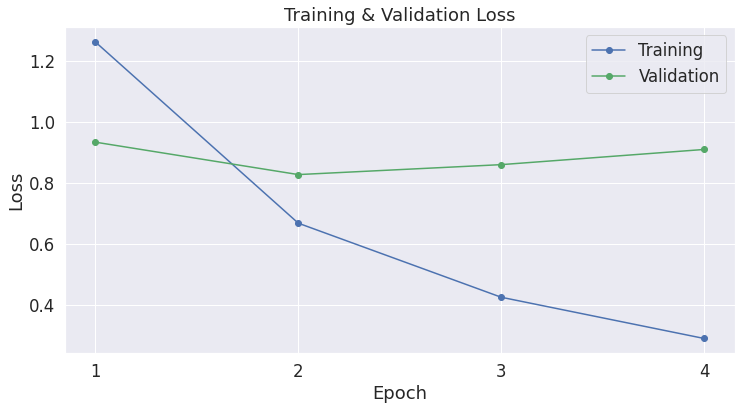

In [95]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
# Testing on val set
model.eval()

# Tracking variables 
total_eval_accuracy = 0
total_eval_loss = 0
nb_eval_steps = 0
prediction = [] #store prediction

# Evaluate data for one epoch
for batch in validation_dataloader:
    
    # Unpack this training batch from our dataloader. After unpacking, we copy
    # the tensor to the GPU as well using .to()
        
    # `batch` contains three pytorch tensors:
    #  0 for input id, 1 for attention mask and 2 for labels
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    
    # Tell pytorch not to bother with constructing the compute graph during
    # the forward pass, since this is only needed for backprop (training).
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        
        (loss, logits) = model(b_input_ids, 
                                token_type_ids=None, 
                                attention_mask=b_input_mask,
                                labels=b_labels)
        
    # Accumulate the validation loss.
    total_eval_loss += loss.item()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    #collect predictions
    # 
    pred = np.argmax(logits, 1)
    prediction.append(pred)

    # Calculate the accuracy for this batch of test sentences, and
    # accumulate it over all batches.
    total_eval_accuracy += flat_accuracy(logits, label_ids)
    

# Report the final accuracy for this validation run.
avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

# # Calculate the average loss over all of the batches.
# avg_val_loss = total_eval_loss / len(validation_dataloader)

# # Measure how long the validation run took.
# validation_time = format_time(time.time() - t0)

print("  Validation Loss: {0:.2f}".format(avg_val_loss))
print("  Validation took: {:}".format(validation_time))


#print('Positive samples: %d of %d (%.2f%%)' % (train.label.sum(), len(train.label), (train.label.sum() / len(train.label) * 100.0)))


  Accuracy: 0.75
  Validation Loss: 0.96
  Validation took: 0:00:18


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (Y.sum(), len(Y), (Y.sum() / len(Y) * 100.0)))


In [ ]:
# import os

# # Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

# output_dir = '/content/drive/My Drive/Colab Notebooks/BERT/'

# # Create output directory if needed
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# print("Saving model to %s" % output_dir)

# # Save a trained model, configuration and tokenizer using `save_pretrained()`.
# # They can then be reloaded using `from_pretrained()`
# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
# tokenizer_bert.save_pretrained(output_dir)

# # Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to /content/drive/My Drive/Colab Notebooks/BERT/


NameError: ignored

In [ ]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('./model_save/saved_model.pb')
# summarize model.
model.summary()


In [ ]:
import os
os.getcwd()

!ls

In [ ]:
from sklearn.metrics import classification_report
flat_predictions = [item for sublist in predictions for item in sublist]
#flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
len(flat_predictions)

2210

In [ ]:
len(flat_true_labels)

2210

In [ ]:
%matplotlib inline
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.43      0.52      0.47        31
           1       0.88      0.71      0.79       180
           2       0.83      0.63      0.72        30
           3       0.53      0.67      0.59        69
           4       0.56      0.59      0.58       150
           5       0.85      0.87      0.86        46
           6       1.00      0.40      0.57        10
           7       0.00      0.00      0.00         2
           8       0.64      0.45      0.53        20
           9       0.72      0.77      0.74        83
          10       0.11      0.06      0.08        33
          11       0.85      0.63      0.72        27
          12       0.90      0.79      0.84       614
          13       0.60      0.68      0.63       188
          14       0.59      0.72      0.65       138
          15       0.00      0.00      0.00         5
          16       0.76      0.85      0.80        91
          17       0.95    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score
f1_score(flat_true_labels, flat_predictions, average='micro')

0.7515837104072398

In [ ]:
f1_score(flat_true_labels, flat_predictions, average='macro')

0.5923448863368601

In [ ]:
f1_score(flat_true_labels, flat_predictions, average='weighted')

0.7494168659778776